In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math

FONT_FAMILY_NAME = 'Droid Sans Fallback';
#用来正常显示中文标签  
plt.rcParams['font.sans-serif']=[FONT_FAMILY_NAME]
#用来正常显示负号 
plt.rcParams['axes.unicode_minus']=False

def move_axis(y_axis_base = 0, x_axis_base=0):
    ax = plt.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    if(y_axis_base != None):
        ax.spines['bottom'].set_position(('data',y_axis_base))
    ax.yaxis.set_ticks_position('left')
    if(x_axis_base != None):
        ax.spines['left'].set_position(('data',x_axis_base))

In [2]:
#6.7, 13.41
#计算收益差
def calcDiff(price, cnt, new_price=6.7, old_price=13.41, old_cnt=800):
    return(price - new_price)*cnt - (old_price - price)*old_cnt

#计算当盈亏为0时的边界价格
def calcBoundaryPrice(cnt, new_price=6.7, old_price=13.41, old_cnt=800):
    return (old_price * old_cnt + new_price * cnt)/(cnt + old_cnt)

def formatFloatArray(ndarray):
    ret = [];
    for num in ndarray:
        ret.append(float("{:.2f}".format(num)))
    return ret

def formatFloat(num):
    return float("{:.2f}".format(num))

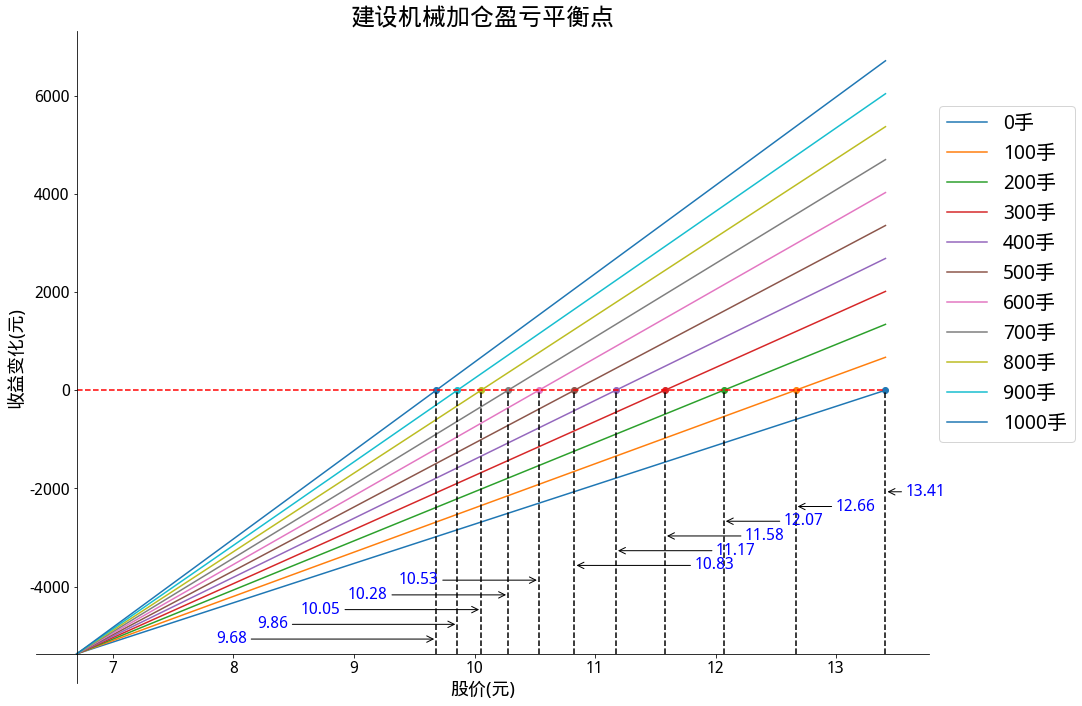

In [3]:
cnts = range(0, 1100, 100)
plt.figure(1, figsize=(16,12))
new_price, old_price = 6.7, 13.41

prices = np.linspace(new_price, old_price, 10)
vfunc = np.vectorize(calcDiff)
formatFunc = np.vectorize(formatFloat)
ydata = []

for i,n in enumerate(cnts):
    y = vfunc(prices, n)
    ydata.append({'cnt': n, 'y': y})

y_min = ydata[0]['y'].min()
y_len = len(ydata)
for i, data in enumerate(ydata):
    y = data['y']
    cnt = data['cnt']
    boundary_price = calcBoundaryPrice(cnt, new_price, old_price)
    boundaryPrice_formatted = formatFloat(boundary_price)
    
    plt.plot(prices, y, label=str(cnt) + u"手")    
    plt.scatter(boundary_price, 0)   
    
    plt.plot([boundary_price, boundary_price], [y_min, 0], color="black", linestyle="--")
    flag = 1
    if(i*2 > y_len):
        flag = -1

    plt.annotate(str(boundaryPrice_formatted),xy=(boundary_price, (y_min + 300 * (y_len - i))), xycoords='data',xytext=(20 * flag * (i+1), -4), 
            textcoords='offset points', fontsize=16, arrowprops=dict(arrowstyle="->"), color="blue")

plt.legend(bbox_to_anchor=(1.0, 0.9), fontsize=20)
plt.plot(prices, prices * 0,linestyle="--", color="red")
plt.title(u"建设机械加仓盈亏平衡点", fontsize=24)

ax=plt.gca()
ax.set_ylabel(u'收益变化(元)',fontsize=18)  
ax.set_xlabel(u'股价(元)',fontsize=18) 
move_axis(y_axis_base = y_min, x_axis_base=new_price)

#设置刻度字体大小
for label in ax.get_xticklabels(): 
    label.set_fontsize(16) 
#     label.set_rotation(-90)
      
for label in ax.get_yticklabels(): 
    label.set_fontsize(16) 

plt.show()